In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import matplotlib.image as img

import os
from os import listdir

In [26]:
import numpy as np
import pandas as pd

import PIL 
from PIL import Image

In [38]:
from sklearn.model_selection import train_test_split

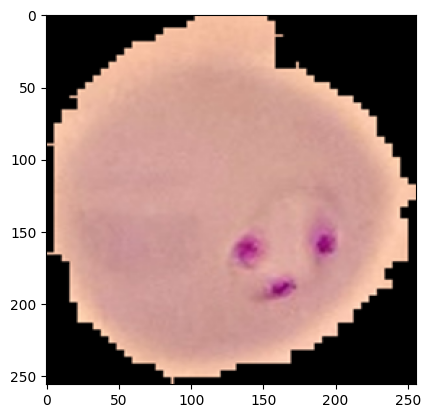

(256, 256, 3)

In [29]:
test = Image.open('Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png')
test = test.resize((256,256))
test=np.array(test)
plt.imshow(test)
plt.show()
test.shape

In [50]:
folder_dir = "Parasitized"
data=[]
l=[]
for images in os.listdir(folder_dir):
    image = Image.open('Parasitized\\' +images)
    image = image.resize((256,256))
    image = np.array(image)
    data+=[image]
    l+=[1]
folder_dir = "Uninfected"
for images in os.listdir(folder_dir):
    image = Image.open('Uninfected\\' +images)
    image = image.resize((256,256))
    image = np.array(image)
    data+=[image]
    l+=[0]

In [49]:
print(df)

                                                   Image  label
0      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
1      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
2      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
3      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
...                                                  ...    ...
27553  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
27554  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
27555  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
27556  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
27557  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0

[27558 rows x 2 columns]


In [51]:
y_data = l
x_data = data

train_images, train_labels, test_images,  test_labels = train_test_split(x_data,y_data)

In [52]:
train_images[1].shape

(256, 256, 3)

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels)

In [ ]:
print(test_acc)